In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.api import ExponentialSmoothing
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv("planilhas/dfRegressaoDias.csv", sep=';', parse_dates=['Data'], index_col="Data")
display(df)
df.info()

split = int(0.7 * len(df))


X_treino = df[:split].index
X_teste = df[split:].index

Y_treino = df[:split].values
Y_teste = df[split:].values

,CasosDia
Data,
2020-03-15,3
2020-03-16,3
2020-03-17,3
2020-03-18,1
2020-03-19,0
...,...
2023-12-27,3
2023-12-28,6
2023-12-29,6


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1387 entries, 2020-03-15 to 2023-12-31
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   CasosDia  1387 non-null   int64
dtypes: int64(1)
memory usage: 21.7 KB


# Média Móvel

970
417
970
417


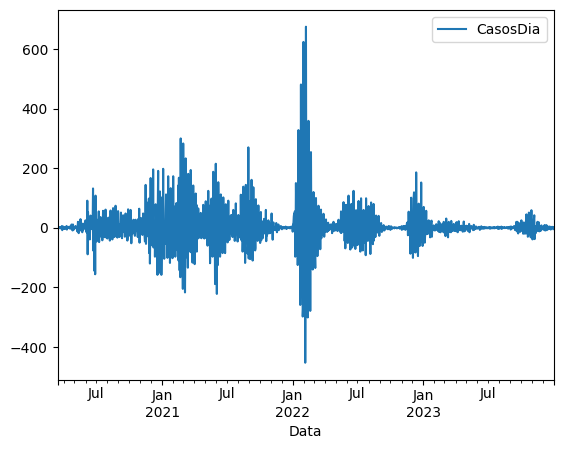

In [42]:
df.diff().plot() 
print(len(X_treino))
print(len(X_teste))
print(len(Y_treino))
print(len(Y_teste))



In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
 
# FUNÇAO RETIRADA DO LIVRO Introduction to Machine Learning with Python
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:                               
    
  total_len = train_len + horizon
  
  if method == 'mean':
      pred_mean = []
      
      for i in range(train_len, total_len, window):
          mean = np.mean(df[:i].values)
          pred_mean.extend(mean for _ in range(window))

      return pred_mean

  elif method == 'last':
      pred_last_value = []
      
      for i in range(train_len, total_len, window):
          last_value = df[:i].iloc[-1].values[0]
          pred_last_value.extend(last_value for _ in range(window))
      return pred_last_value
  
  elif method == 'MA':  # MA de ordem Q
      pred_MA = []
      
      for i in range(train_len, total_len, window):
          model = SARIMAX(df[:i], order=(0,0,2))                  
          res = model.fit(disp=False)
          predictions = res.get_prediction(0, i + window - 1)
          oos_pred = predictions.predicted_mean.iloc[-window:]    
          pred_MA.extend(oos_pred)
          
      return pred_MA
  

janela = [1, 2, 4,6,8]
all_preds = []



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
970
417
[417, 418, 417, 420, 420, 420, 420, 424, 423, 420, 418, 420, 429, 420, 420, 432, 425, 432, 418, 420]


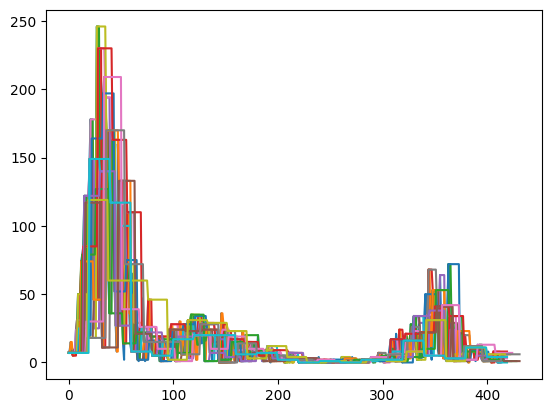

In [60]:
janela = [1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
all_preds = []

# MEDIA MOVEL DE ORDEM Q - MEDIA MOVEL
for j in janela:
    pred = rolling_forecast(df, len(Y_treino), len(Y_teste), j, 'last')
    all_preds.append(pred)
    print(j)

    plt.plot(pred, linestyle='-')

print(len(Y_treino))
print(len(X_teste))
print([len(pred) for pred in all_preds])

# DA VALORES DE PREDIÇAO DIFERENTES DO TAMANHO DO TESTE (APENAS JANELAS 1 2 e 4 da certo)


93152.0
Data
2020-03-15    3.0
2020-03-16    3.0
2020-03-17    3.0
2020-03-18    1.0
2020-03-19    0.0
             ... 
2023-12-27    3.0
2023-12-28    6.0
2023-12-29    6.0
2023-12-30    1.0
2023-12-31    2.0
Name: CasosDia, Length: 1387, dtype: float64


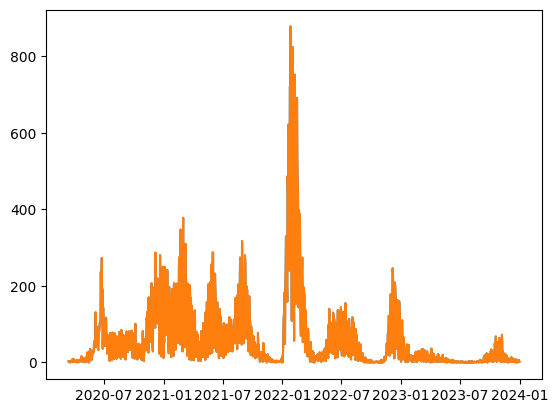

In [ ]:
janela = 20

pred= pred= df['CasosDia'].rolling(1).mean()

print((pred.sum()))


#serieMM = pd.Series(pred, index=X_teste)
plt.plot(df['CasosDia'], linestyle='-')
plt.plot(pred, linestyle='-')

print(pred)


## NUMEROS NEGATIVOS

Previsões:
388


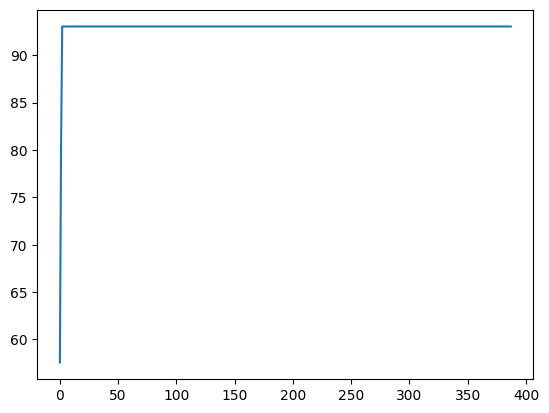

In [ ]:
#USANDO ARIMA APENAS ORDEM Q

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Função para fazer a previsão usando a média móvel de ordem Q
def ma_prediction(train_data, test_data, order_q):
    # Ajuste o modelo SARIMA aos dados de treinamento
    model = ARIMA(train_data, order=(0, 0, order_q))
    model_fit = model.fit()
    
    # Faça previsões nos dados de teste
    predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
    
    return predictions


# Defina a ordem Q para a média móvel
order_q = 2

# Faça a previsão usando a média móvel de ordem Q
predictions = ma_prediction(Y_treino, Y_teste, order_q)

print("Previsões:")
print(len(predictions))


plt.plot(predictions)

!! ULTIMO VALOR (20) É A MÉDIA !!!


,PARA,MAE,MSE,RMSE
0,1,18.73,1664.34,40.8
1,1,18.73,1664.34,40.8
2,1,18.73,1664.34,40.8
3,1,18.73,1664.34,40.8
4,1,18.73,1664.34,40.8
5,1,18.73,1664.34,40.8
6,1,18.73,1664.34,40.8
7,1,18.73,1664.34,40.8
8,1,18.73,1664.34,40.8
9,1,18.73,1664.34,40.8


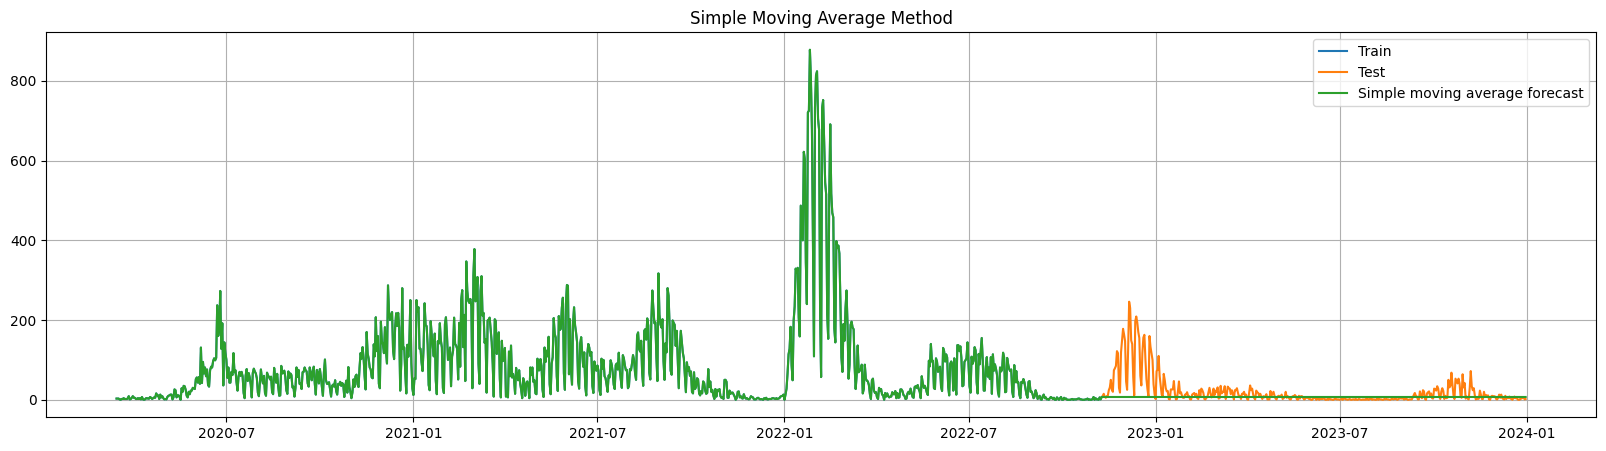

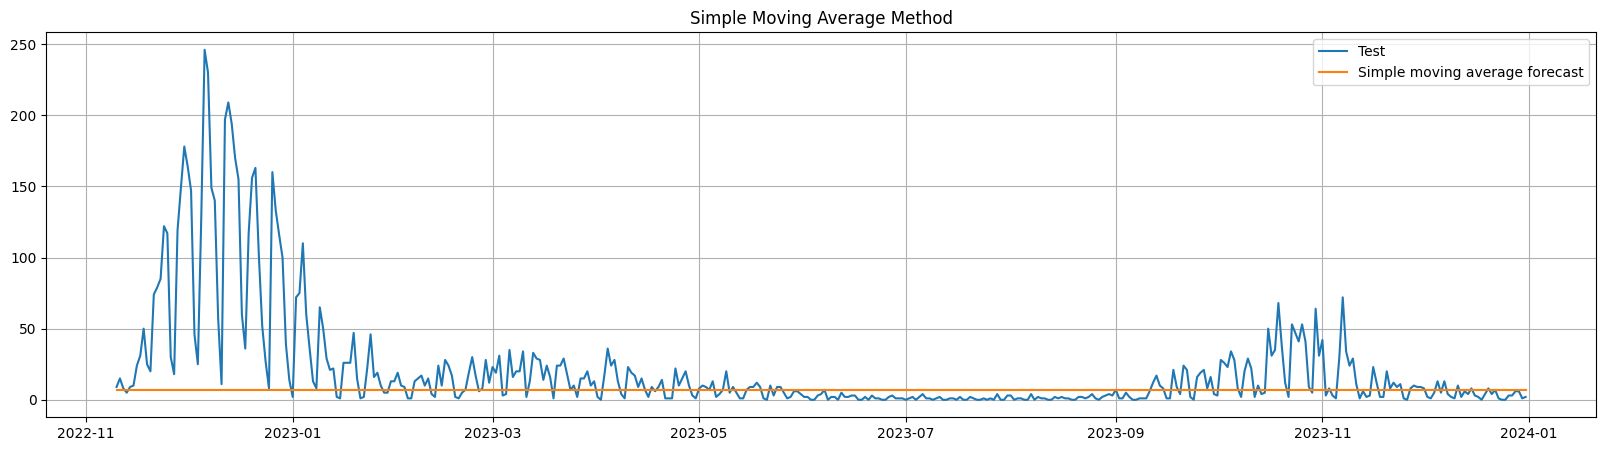

In [48]:
janela = range(1, 30)

train = df[:split]
test = df[split:]

mseMM = []
rmseMM = []
maeMM = []
parametrosMM = []
auxMae = 0


for j in range(20):

    maeCalibra = 0
    auxMae = 0
    ## CALIBRAR
    for i in janela:
        media_movel = df['CasosDia'].rolling(i).mean()
        media_movel[split:] = media_movel[split-1]

        maeCalibra = mean_squared_error(test['CasosDia'], media_movel[split:]).round(2)

        if (maeCalibra < auxMae or auxMae == 0):
            auxMae = maeCalibra
            para_MM = i



    ## TREINA
    media_movel = df['CasosDia'].rolling(para_MM).mean()
    media_movel[split:] = media_movel[split-1]

    mae = mean_absolute_error(test['CasosDia'], media_movel[split:]).round(2)
    mse = mean_squared_error(test['CasosDia'], media_movel[split:]).round(2)
    rmse = np.sqrt(mse).round(2)

    mseMM.append(mse)
    rmseMM.append(rmse)
    maeMM.append(mae)
    parametrosMM.append(para_MM)


# RESULTADOSSSS !!!!
    
parametroMaisEscolhidoMM = max(set(parametrosMM), key=parametrosMM.count)
media_maeMM = np.mean(maeMM)
media_mseMM = np.mean(mseMM)
media_rmseMM = np.mean(rmseMM)

parametrosMM.append(parametroMaisEscolhidoMM)
maeMM.append(media_maeMM)
mseMM.append(media_mseMM)
rmseMM.append(media_rmseMM)


dfMediaMovel = pd.DataFrame({
    'PARA': parametrosMM,
    'MAE': maeMM,
    'MSE': mseMM,
    'RMSE': rmseMM
})


print("!! ULTIMO VALOR (20) É A MÉDIA !!!")
display(dfMediaMovel)

dfMediaMovel.to_csv('resultadosModelos/dfMediaMovel.csv', sep = ';', index = False, encoding='UTF-8')



plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['CasosDia'], label='Train')
plt.plot(test['CasosDia'], label='Test')
plt.plot(media_movel, label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(test['CasosDia'], label='Test')
plt.plot(media_movel[split:], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

!! ULTIMO VALOR (20) É A MÉDIA !!!


,PARA,MAE,MSE,RMSE
0,19,13.22,664.63,25.78
1,19,13.22,664.63,25.78
2,19,13.22,664.63,25.78
3,19,13.22,664.63,25.78
4,19,13.22,664.63,25.78
5,19,13.22,664.63,25.78
6,19,13.22,664.63,25.78
7,19,13.22,664.63,25.78
8,19,13.22,664.63,25.78
9,19,13.22,664.63,25.78


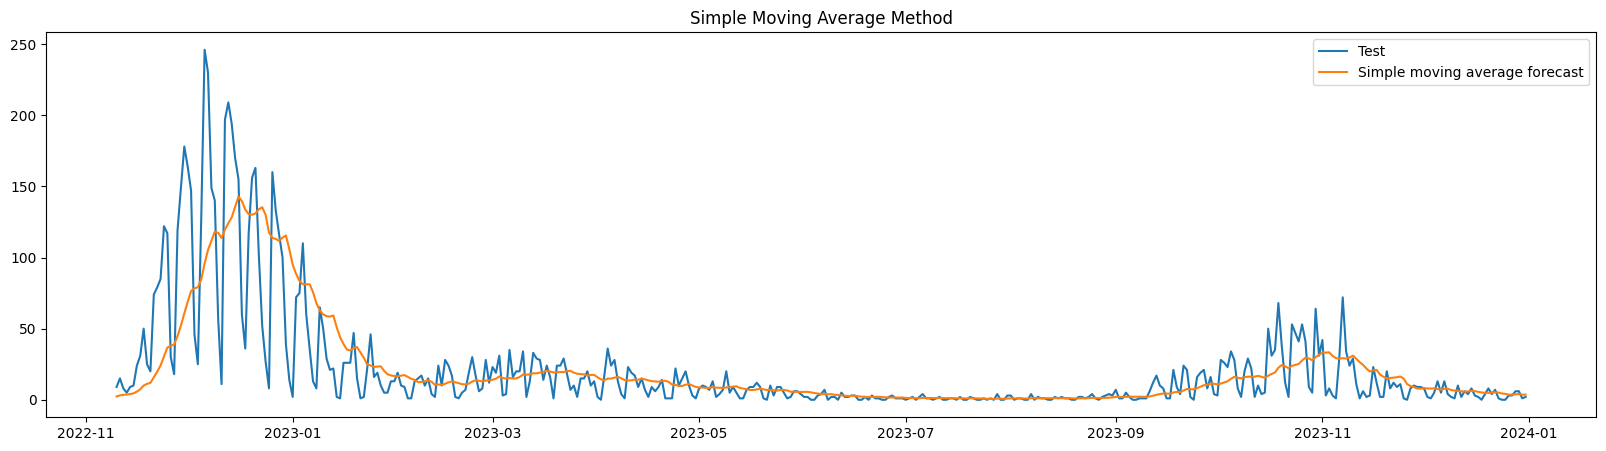

In [49]:
janela = range(1, 20)

train = df[:split]
test = df[split:]

mseMM = []
rmseMM = []
maeMM = []
parametrosMM = []

bestMae = float('inf')


for j in range(20):

    maeCalibra = 0
    auxMae = 0
    ## CALIBRAR
    for i in janela:
        media_movel = df['CasosDia'].rolling(20).mean()

        maeCalibra = mean_squared_error(df[split:], media_movel[split:]).round(2)

        if (maeCalibra < bestMae):
            auxMae = maeCalibra
            para_MM = i



    ## TREINA
    media_movel = df['CasosDia'].rolling(para_MM).mean()

    mae = mean_absolute_error(test['CasosDia'], media_movel[split:]).round(2)
    mse = mean_squared_error(test['CasosDia'], media_movel[split:]).round(2)
    rmse = np.sqrt(mse).round(2)

    mseMM.append(mse)
    rmseMM.append(rmse)
    maeMM.append(mae)
    parametrosMM.append(para_MM)


# RESULTADOSSSS !!!!
    
parametroMaisEscolhidoMM = max(set(parametrosMM), key=parametrosMM.count)
media_maeMM = np.mean(maeMM)
media_mseMM = np.mean(mseMM)
media_rmseMM = np.mean(rmseMM)

parametrosMM.append(parametroMaisEscolhidoMM)
maeMM.append(media_maeMM)
mseMM.append(media_mseMM)
rmseMM.append(media_rmseMM)


dfMediaMovel = pd.DataFrame({
    'PARA': parametrosMM,
    'MAE': maeMM,
    'MSE': mseMM,
    'RMSE': rmseMM
})


print("!! ULTIMO VALOR (20) É A MÉDIA !!!")
display(dfMediaMovel)

dfMediaMovel.to_csv('resultadosModelos/dfMediaMovel.csv', sep = ';', index = False, encoding='UTF-8')




plt.figure(figsize=(20,5))
plt.plot(df[split:], label='Test')
plt.plot(media_movel[split:], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

417


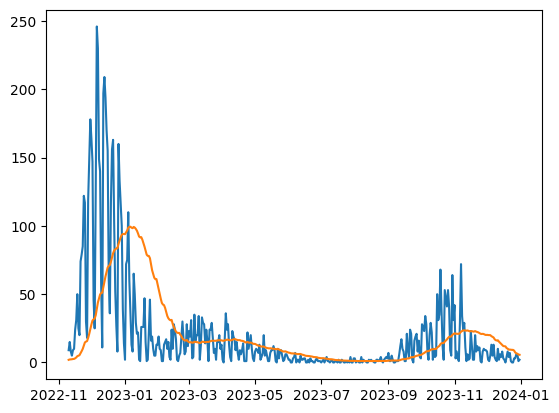

In [52]:
media_movel = df['CasosDia'].rolling(50).mean()

maeCalibra = mean_squared_error(df[split:], media_movel[split:]).round(2)

print(len(media_movel[split:]))
plt.plot(df[split:])
plt.plot(media_movel[split:])





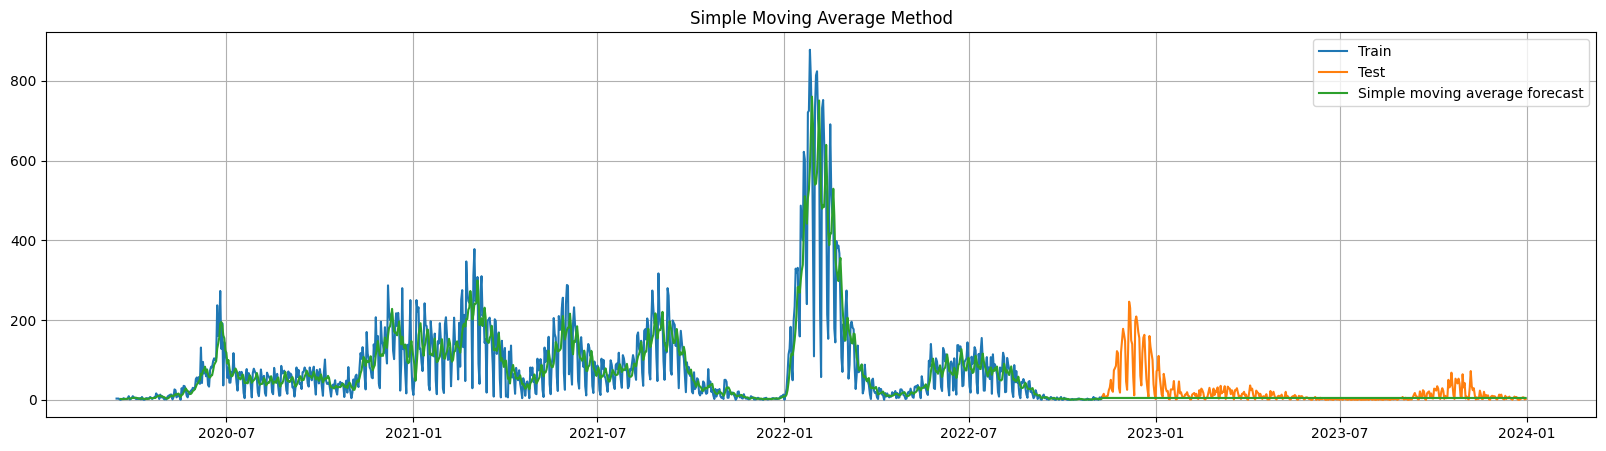

In [58]:

train = df[:split] # first 120 months as training set
test = df[split:] 

y_hat_sma = df.copy()
ma_window = 5
y_hat_sma['sma_forecast'] = df['CasosDia'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][split:] = y_hat_sma['sma_forecast'][split]

plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['CasosDia'], label='Train')
plt.plot(test['CasosDia'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

## https://www.kaggle.com/code/gauravduttakiit/timeseries-forecasting-with-simple-moving-average

In [67]:
janela = range(1, 20)

train = df[:split]
test = df[split:]

mseMM = []
rmseMM = []
maeMM = []
parametrosMM = []

bestMae = float('inf')


## CALIBRAR
for i in janela:
    media_movel = train['CasosDia'].rolling(j).mean().fillna(0)

    maeCalibra = mean_squared_error(train['CasosDia'], media_movel).round(2)

    if (maeCalibra < bestMae):
        bestMae = maeCalibra
        para_MM = i



## TREINA
media_movel = df['CasosDia'].rolling(para_MM).mean().fillna(0)

mae = mean_absolute_error(test['CasosDia'], media_movel[split:]).round(2)
mse = mean_squared_error(test['CasosDia'], media_movel[split:]).round(2)
rmse = np.sqrt(mse).round(2)

mseMM.append(mse)
rmseMM.append(rmse)
maeMM.append(mae)
parametrosMM.append(para_MM)


# RESULTADOSSSS !!!!
    
parametroMaisEscolhidoMM = max(set(parametrosMM), key=parametrosMM.count)
media_maeMM = np.mean(maeMM)
media_mseMM = np.mean(mseMM)
media_rmseMM = np.mean(rmseMM)

parametrosMM.append(parametroMaisEscolhidoMM)
maeMM.append(media_maeMM)
mseMM.append(media_mseMM)
rmseMM.append(media_rmseMM)


dfMediaMovel = pd.DataFrame({
    'PARA': parametrosMM,
    'MAE': maeMM,
    'MSE': mseMM,
    'RMSE': rmseMM
})


print("!! ULTIMO VALOR (20) É A MÉDIA !!!")
display(dfMediaMovel)


!! ULTIMO VALOR (20) É A MÉDIA !!!


,PARA,MAE,MSE,RMSE
0,1,0.0,0.0,0.0
1,1,0.0,0.0,0.0
